# **TikTok Project**
**Statistical Review and A/B Testing**

## Overview
An experimental A/B testing project for TikTok, the data set has been already cleaned and prepared for the analysis.

Orion Rainier, Data Scientist at TikTok, is requesting to determine and conduct the necessary hypothesis tests and statistical analysis for the TikTok classification project.


# **Data exploration and hypothesis testing**

**The purpose** of this project is to demonstrate knowledge of how to prepare, create, and analyze hypothesis tests.

**The goal** is to apply descriptive and inferential statistics, probability distributions, and hypothesis testing in Python.

# **PACE stages**

We apply the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

## **PACE: Plan**

1. What is the research question for this data project?

<font color=FFB6C1>
Whether there is a significant difference in video views for verified versus unverified accounts.

### **Task 1. Imports and Data Loading**

In [1]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
# Load dataset into dataframe
tiktok_df = pd.read_csv(r"C:\Users\spectre\Downloads\tiktok_dataset.csv")

## **PACE: Analyze and Construct**

### **Task 2. Data exploration**

Inspect the first five rows of the dataframe.

In [4]:
tiktok_df.head(5)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [5]:
# Generate a table of descriptive statistics about the data
tiktok_df.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


Check for and handle missing values.

In [6]:
# Check for missing values
tiktok_df.isnull().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [7]:
# Drop rows with missing values
tiktok_df = tiktok_df.dropna()

In [8]:
# Display first few rows after handling missing values
tiktok_df.head(5)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


We are interested in the relationship between `verified_status` and `video_view_count`. One approach is to examine the mean value of `video_view_count` for each group of `verified_status` in the sample data.

In [9]:
# Compute the mean `video_view_count` for each group in `verified_status`
tiktok_df.groupby('verified_status')['video_view_count'].mean()

verified_status
not verified    265663.785339
verified         91439.164167
Name: video_view_count, dtype: float64

<Axes: xlabel='verified_status', ylabel='video_view_count'>

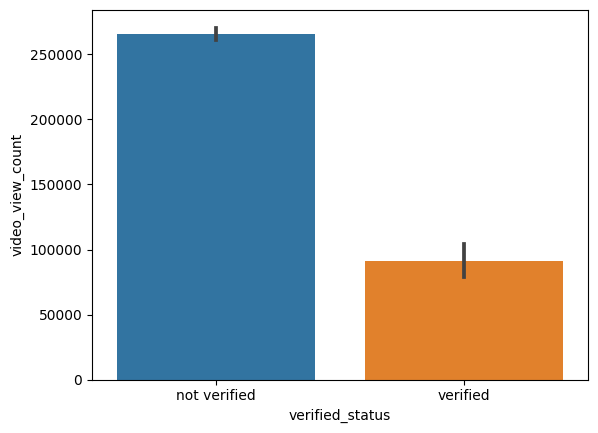

In [17]:
# Plot the `video_view_count` mean for each group in `verified_status`
sns.barplot(x='verified_status', y='video_view_count', data=tiktok_df)

### **Task 3. Hypothesis testing**

We will conduct a two-sample t-test following the steps below : 

1.   State the null hypothesis and the alternative hypothesis
2.   Choose a significance level
3.   Find the p-value
4.   Reject or fail to reject the null hypothesis 

#### 3.1. State the null hypothesis and the alternative hypothesis

<font color=FFB6C1>

$H_0$: There is no difference in number of views between TikTok videos posted by verified accounts and TikTok videos posted by unverified accounts (any observed difference in the sample data is due to chance or sampling variability).

$H_A$: There is a difference in number of views between TikTok videos posted by verified accounts and TikTok videos posted by unverified accounts (any observed difference in the sample data is due to an actual difference in the corresponding population means).

#### 3.2. Choose the significance level
We choose 5% as the significance level and proceed with a two-sample t-test.

In [18]:
significance = 0.05

In [25]:
# Create two samples : verified and not verified
verified = tiktok_df[tiktok_df['verified_status'] == 'verified']['video_view_count']
not_verified = tiktok_df[tiktok_df['verified_status'] == 'not verified']['video_view_count']

#### 3.3. Find the p-value

In [26]:
# Compute the p-value
p_value = stats.ttest_ind(verified, not_verified, equal_var=False)[1]
p_value

2.6088823687177823e-120

#### 3.4. Reject or fail to reject the null hypothesis
<font color=#FFB6C1>
The p-value is equal to 2.60, which is smaller than the significance level of 5%. Therefore, we reject the null hypothesis in favor of the alternative hypothesis and conclude that there is a difference in the average video views between verified accounts and unverified accounts.

## **PACE: Execute**

### **Task 4: Communicate insights with stakeholders**

### Recommendations for the stakeholders:
    Following our findings, we recommend the following to stakeholders: 
        * Consider editing the algorithm to push verified accounts to users more frequently in order to increase the number of views.
        * The team suggests moving forward and building a regression model on verified status. 
        * A regression model for verified_status can help analyze user behavior in this group of verified users. Then, this context can be used to consider results from a claim classification model that will be created afterwards. 
